In [8]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error

In [2]:
data = sns.load_dataset('penguins')

In [5]:
data.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


In [3]:
# Drop nulls here
data = data.dropna(how='any')

In [4]:
# One hot encode our three 'object' columns
data_num = pd.get_dummies(data, columns=['species', 'island', 'sex'],
                          drop_first=True)

In [10]:
data_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 343
Data columns (total 9 columns):
culmen_length_mm     333 non-null float64
culmen_depth_mm      333 non-null float64
flipper_length_mm    333 non-null float64
body_mass_g          333 non-null float64
species_Chinstrap    333 non-null uint8
species_Gentoo       333 non-null uint8
island_Dream         333 non-null uint8
island_Torgersen     333 non-null uint8
sex_MALE             333 non-null uint8
dtypes: float64(4), uint8(5)
memory usage: 14.6 KB


In [9]:
np.sqrt(333)

18.24828759089466

In [11]:
# Define X and y
X_cols = [c for c in data_num.columns.to_list() if c not in ['body_mass_g']]

X = data_num[X_cols]
y = data_num.body_mass_g

In [12]:
# Perform a train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [13]:
# Instantiate a scaler
scaler = StandardScaler()

In [14]:
# Train our scaler on training data, then fit to testing
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
# Instantiate a linear regression model
lr = LinearRegression()

In [16]:
# Fit our model on our scaled data
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [17]:
# Evaluate
y_train_pred = lr.predict(X_train_scaled)
y_test_pred = lr.predict(X_test_scaled)

print("Training Scores:")
print(f"R2: {r2_score(y_train, y_train_pred)}")
print(f"Mean Absolute Error: {mean_absolute_error(y_train, y_train_pred)}")
print("---")
print("Testing Scores:")
print(f"R2: {r2_score(y_test, y_test_pred)}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_test_pred)}")

Training Scores:
R2: 0.8835046607519164
Mean Absolute Error: 219.1191420593363
---
Testing Scores:
R2: 0.8381928549467245
Mean Absolute Error: 252.31160554606964


In [35]:
y_test_pred

array([3450.3567164 , 4125.05816125, 3875.79769484, 4737.64103731,
       3314.99481466, 4240.09008377, 4573.88361224, 5476.12836051,
       3885.78702591, 5393.60906218, 3868.81747771, 3471.41835268,
       3638.44981798, 3613.13580832, 4213.16300403, 4058.79496719,
       4715.34730604, 3468.58943846, 3219.88040328, 4074.9797681 ,
       4625.23468792, 4018.37828024, 4624.75211101, 3561.0899284 ,
       4640.23726978, 4701.12947147, 4140.88563621, 5370.03000897,
       4092.90794942, 4305.22745543, 4736.53495954, 4159.34127612,
       3279.8603199 , 3227.21076245, 3277.98213425, 3425.86689869,
       5486.23119267, 5249.65385373, 5441.12632013, 3929.05759332,
       5369.74882429, 3911.53831518, 4324.20062862, 3267.00577412,
       4111.23833836, 3447.40008266, 3458.07595522, 3191.32556214,
       5294.92296067, 3951.57715172, 5398.62991251, 4766.49815187,
       3465.62614123, 4087.92608252, 4730.51113433, 3382.63379414,
       3355.37841542, 4153.69704822, 4772.50397934, 4053.32333

In [36]:
residuals_train = y_train_pred - y_train
residuals_test = y_test_pred - y_test

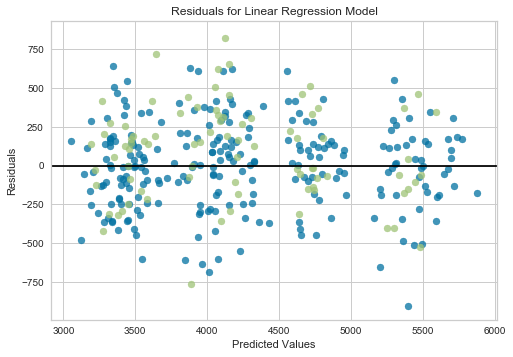

In [41]:
plt.scatter(y_train_pred, residuals_train, alpha=.75)
plt.scatter(y_test_pred, residuals_test, color='g', alpha=.75)

plt.axhline(y=0, color='black')

plt.title('Residuals for Linear Regression Model')
plt.ylabel('Residuals')
plt.xlabel('Predicted Values')
plt.show()

In [22]:
from yellowbrick.regressor import ResidualsPlot

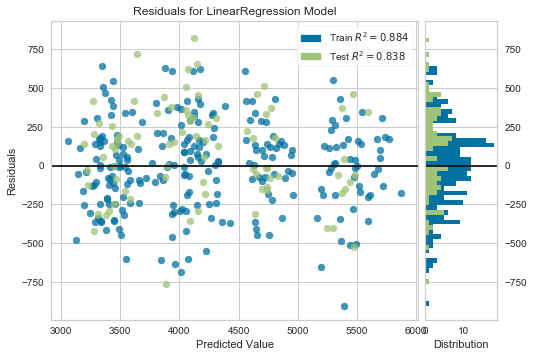

In [24]:
visualizer = ResidualsPlot(lr)

visualizer.fit(X_train_scaled, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test_scaled, y_test)  # Evaluate the model on the test data
visualizer.show()                        # Finalize and render the figure
